# Yazılı & Sözlü Soru Önergeleri - Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
onergeler = pd.read_csv("onergeler_yazili_sozlu_22_26.csv", parse_dates=[2])

In [3]:
# Create "Donemi", "Yasama_Yili", "Milletvekili_Sehri", and "Milletvekili_Adi" columns
onergeler["Donemi"] = onergeler["Donemi_ve_Yasama_Yili"].apply(lambda x: x.split("/")[0]).astype("int64")
onergeler["Yasama_Yili"] = onergeler["Donemi_ve_Yasama_Yili"].apply(lambda x: x.split("/")[1]).astype("int64")
onergeler["Milletvekili_Sehri"] = onergeler["Milletvekili"].apply(lambda x: x.split()[0])
onergeler["Milletvekili_Adi"] = onergeler["Milletvekili"].apply(lambda x: ' '.join(x.split()[2:]))

In [4]:
# Order columns and sort rows
onergeler = onergeler[['Donemi_ve_Yasama_Yili', 'Donemi',
                       'Yasama_Yili', 'Esas_No', 'Baskanliga_Gelis_Tarihi',
                       'Milletvekili', 'Ozeti', 'Onerge_Grubu', 'Milletvekili_Adi', 'Milletvekili_Sehri']]
onergeler = onergeler.sort_values(by=["Donemi", "Yasama_Yili", "Onerge_Grubu", "Baskanliga_Gelis_Tarihi"]).reset_index(drop=True)

In [5]:
onergeler.head()

,Donemi_ve_Yasama_Yili,Donemi,Yasama_Yili,Esas_No,Baskanliga_Gelis_Tarihi,Milletvekili,Ozeti,Onerge_Grubu,Milletvekili_Adi,Milletvekili_Sehri
0,22/1,22,1,6/5,2002-04-12,KASTAMONU MİLLETVEKİLİ MEHMET YILDIRIM,Sarımsak ithalatına ilişkin,sözlü,MEHMET YILDIRIM,KASTAMONU
1,22/1,22,1,6/4,2002-04-12,KASTAMONU MİLLETVEKİLİ MEHMET YILDIRIM,Köy Hizmetleri Genel Müdürlüğü taşra teşkilatı...,sözlü,MEHMET YILDIRIM,KASTAMONU
2,22/1,22,1,6/9,2002-09-12,DENİZLİ MİLLETVEKİLİ MUSTAFA GAZALCI,Yönetim kademelerinde vekaleten görev yapan pe...,sözlü,MUSTAFA GAZALCI,DENİZLİ
3,22/1,22,1,6/8,2002-09-12,DENİZLİ MİLLETVEKİLİ MUSTAFA GAZALCI,Pamukta prim ve çekirdeksiz kuru üzümde destek...,sözlü,MUSTAFA GAZALCI,DENİZLİ
4,22/1,22,1,6/7,2002-09-12,MANİSA MİLLETVEKİLİ HASAN ÖREN,Doğrudan Gelir Desteği Projesinde öncelik krit...,sözlü,HASAN ÖREN,MANİSA


In [6]:
onergeler.tail()

,Donemi_ve_Yasama_Yili,Donemi,Yasama_Yili,Esas_No,Baskanliga_Gelis_Tarihi,Milletvekili,Ozeti,Onerge_Grubu,Milletvekili_Adi,Milletvekili_Sehri
151384,26/3,26,3,7/27987,2018-12-04,SİNOP MİLLETVEKİLİ BARIŞ KARADENİZ,Sinop'taki bir Kuran kursunun bakım onarım mas...,yazılı,BARIŞ KARADENİZ,SİNOP
151385,26/3,26,3,7/27986,2018-12-04,MERSİN MİLLETVEKİLİ DURMUŞ FİKRİ SAĞLAR,İran sınırından giriş yapan kaçak Afgan göçmen...,yazılı,DURMUŞ FİKRİ SAĞLAR,MERSİN
151386,26/3,26,3,7/27101,2018-12-04,İSTANBUL MİLLETVEKİLİ SİBEL ÖZDEMİR,Meclis Sohbetleri kapsamında yapılan harcamala...,yazılı,SİBEL ÖZDEMİR,İSTANBUL
151387,26/3,26,3,7/23130,NaT,ANKARA MİLLETVEKİLİ MUSTAFA MİT,6111 sayılı Kanun kapsamında prim alacaklarını...,yazılı,MUSTAFA MİT,ANKARA
151388,26/3,26,3,7/17925,NaT,İSTANBUL MİLLETVEKİLİ MUSTAFA SEZGİN TANRIKULU,2016-2017 yılları arasında Bakanlığa bağlı kur...,yazılı,MUSTAFA SEZGİN TANRIKULU,İSTANBUL


In [7]:
onergeler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151389 entries, 0 to 151388
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Donemi_ve_Yasama_Yili    151389 non-null  object        
 1   Donemi                   151389 non-null  int64         
 2   Yasama_Yili              151389 non-null  int64         
 3   Esas_No                  151389 non-null  object        
 4   Baskanliga_Gelis_Tarihi  151379 non-null  datetime64[ns]
 5   Milletvekili             151389 non-null  object        
 6   Ozeti                    151389 non-null  object        
 7   Onerge_Grubu             151389 non-null  object        
 8   Milletvekili_Adi         151389 non-null  object        
 9   Milletvekili_Sehri       151389 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 11.6+ MB


In [8]:
onergeler.to_csv("onergeler.csv", index=False, encoding="utf-8")

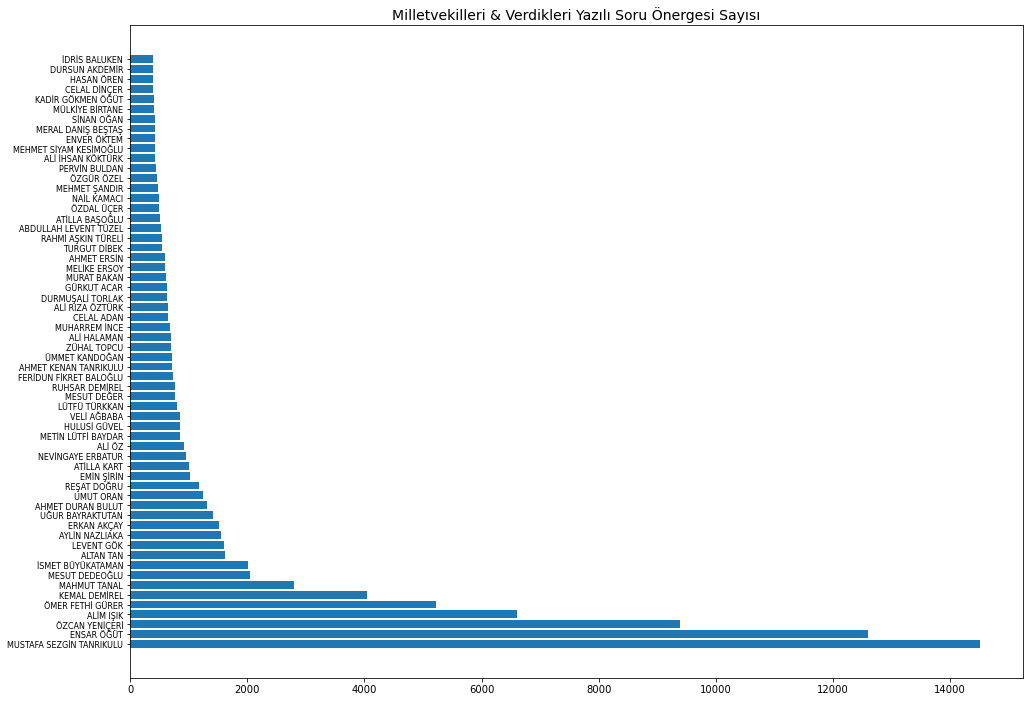

In [9]:
# Milletvekilleri & Verdikleri Yazılı Soru Önergesi Sayısı
plt.figure(figsize=(16, 12))
plt.barh(y=onergeler["Milletvekili_Adi"].value_counts()[:60].index,
         width=onergeler["Milletvekili_Adi"].value_counts()[:60].values)
plt.title("Milletvekilleri & Verdikleri Yazılı Soru Önergesi Sayısı", fontsize=14)
plt.yticks(fontsize=8)
plt.show()

In [10]:
# Most common words in "Ozeti"
from collections import Counter
ozetler = onergeler["Ozeti"].apply(lambda x: x.lower())

ozet_words = []

for ozet in ozetler:
    for word in ozet.split():
        ozet_words.append(word)
        
Counter(ozet_words).most_common(100)

[('ilişkin', 148606),
 ('ve', 63070),
 ('bir', 26944),
 ('yapılan', 12423),
 ('ile', 12102),
 ('bazı', 10900),
 ('ilgili', 9447),
 ('bağlı', 8194),
 ('arasında', 8162),
 ('yılları', 7674),
 ('tarafından', 7219),
 ('yönelik', 7081),
 ('için', 5789),
 ('kurum', 5756),
 ('bakanlık', 5637),
 ('yol', 5326),
 ('yatırımlara', 5144),
 ('su', 5031),
 ('sorunlarına', 4861),
 ('iddiasına', 4730),
 ('alınan', 4630),
 ('iddialarına', 4504),
 ('edilen', 4327),
 ('çalışmalara', 4240),
 ('iddialara', 4179),
 ('i̇lindeki', 4175),
 ('köyün', 4056),
 ('sorununa', 3931),
 ('sayısına', 3763),
 ('sağlık', 3201),
 ('yaşanan', 3177),
 ('kapsamında', 2934),
 ('kamu', 2903),
 ('bulunan', 2874),
 ('eğitim', 2722),
 ('yılında', 2599),
 ('olan', 2534),
 ('planlanan', 2484),
 ('gerçekleştirilen', 2436),
 ('ilişkin.', 2382),
 ('yılı', 2276),
 ('ihtiyacına', 2270),
 ('ilçesinde', 2253),
 ('personele', 2226),
 ('elektrik', 2190),
 ('personel', 2172),
 ('bakanlığa', 2149),
 ('sosyal', 2136),
 ('projelere', 2134),
 ('ge

## 22.-26. Dönem Arasında Verilen Önerge Sayısı

In [11]:
yazili_onergeler = onergeler[onergeler["Onerge_Grubu"] == "yazılı"].reset_index(drop=True)
sozlu_onergeler = onergeler[onergeler["Onerge_Grubu"] == "sözlü"].reset_index(drop=True)

In [12]:
milletvekilleri = sorted(onergeler["Milletvekili"].unique())

In [13]:
yazili_onerge_group = pd.DataFrame(yazili_onergeler.groupby("Donemi")["Milletvekili"].value_counts()).rename({"Milletvekili":"Onerge_Sayisi"}, axis=1).reset_index()
sozlu_onerge_group = pd.DataFrame(sozlu_onergeler.groupby("Donemi")["Milletvekili"].value_counts()).rename({"Milletvekili":"Onerge_Sayisi"}, axis=1).reset_index()

In [14]:
yazili_onerge_group.head(3)

,Donemi,Milletvekili,Onerge_Sayisi
0,22,ARDAHAN MİLLETVEKİLİ ENSAR ÖĞÜT,5198
1,22,BURSA MİLLETVEKİLİ KEMAL DEMİREL,3014
2,22,İSTANBUL MİLLETVEKİLİ EMİN ŞİRİN,1014


In [15]:
sozlu_onerge_group.head(3)

,Donemi,Milletvekili,Onerge_Sayisi
0,22,ARDAHAN MİLLETVEKİLİ ENSAR ÖĞÜT,753
1,22,ANTALYA MİLLETVEKİLİ FERİDUN FİKRET BALOĞLU,176
2,22,İZMİR MİLLETVEKİLİ VEZİR AKDEMİR,115


In [16]:
yazili_onerge_sayisi = pd.DataFrame(columns=["Milletvekili", "Donem_22", "Donem_23", "Donem_24", "Donem_25", "Donem_26"])

for i, milletvekili in enumerate(milletvekilleri):
    
    donem_onerge = []
    for donem in range(22, 27):
        try:
            donem_onerge.append(yazili_onerge_group[(yazili_onerge_group["Milletvekili"] == milletvekili) & (yazili_onerge_group["Donemi"] == donem)]["Onerge_Sayisi"].values[0])
        except IndexError:
            donem_onerge.append(np.nan)
    
    yazili_onerge_sayisi = yazili_onerge_sayisi.append(pd.Series([milletvekili] + donem_onerge, index=yazili_onerge_sayisi.columns), ignore_index=True)
    
    print(f"{i+1}/{len(milletvekilleri)} | {(i+1)/(len(milletvekilleri))*100:.2f}%")

1/880 | 0.11%
2/880 | 0.23%
3/880 | 0.34%
4/880 | 0.45%
5/880 | 0.57%
6/880 | 0.68%
7/880 | 0.80%
8/880 | 0.91%
9/880 | 1.02%
10/880 | 1.14%
11/880 | 1.25%
12/880 | 1.36%
13/880 | 1.48%
14/880 | 1.59%
15/880 | 1.70%
16/880 | 1.82%
17/880 | 1.93%
18/880 | 2.05%
19/880 | 2.16%
20/880 | 2.27%
21/880 | 2.39%
22/880 | 2.50%
23/880 | 2.61%
24/880 | 2.73%
25/880 | 2.84%
26/880 | 2.95%
27/880 | 3.07%
28/880 | 3.18%
29/880 | 3.30%
30/880 | 3.41%
31/880 | 3.52%
32/880 | 3.64%
33/880 | 3.75%
34/880 | 3.86%
35/880 | 3.98%
36/880 | 4.09%
37/880 | 4.20%
38/880 | 4.32%
39/880 | 4.43%
40/880 | 4.55%
41/880 | 4.66%
42/880 | 4.77%
43/880 | 4.89%
44/880 | 5.00%
45/880 | 5.11%
46/880 | 5.23%
47/880 | 5.34%
48/880 | 5.45%
49/880 | 5.57%
50/880 | 5.68%
51/880 | 5.80%
52/880 | 5.91%
53/880 | 6.02%
54/880 | 6.14%
55/880 | 6.25%
56/880 | 6.36%
57/880 | 6.48%
58/880 | 6.59%
59/880 | 6.70%
60/880 | 6.82%
61/880 | 6.93%
62/880 | 7.05%
63/880 | 7.16%
64/880 | 7.27%
65/880 | 7.39%
66/880 | 7.50%
67/880 | 7.61%
68/8

513/880 | 58.30%
514/880 | 58.41%
515/880 | 58.52%
516/880 | 58.64%
517/880 | 58.75%
518/880 | 58.86%
519/880 | 58.98%
520/880 | 59.09%
521/880 | 59.20%
522/880 | 59.32%
523/880 | 59.43%
524/880 | 59.55%
525/880 | 59.66%
526/880 | 59.77%
527/880 | 59.89%
528/880 | 60.00%
529/880 | 60.11%
530/880 | 60.23%
531/880 | 60.34%
532/880 | 60.45%
533/880 | 60.57%
534/880 | 60.68%
535/880 | 60.80%
536/880 | 60.91%
537/880 | 61.02%
538/880 | 61.14%
539/880 | 61.25%
540/880 | 61.36%
541/880 | 61.48%
542/880 | 61.59%
543/880 | 61.70%
544/880 | 61.82%
545/880 | 61.93%
546/880 | 62.05%
547/880 | 62.16%
548/880 | 62.27%
549/880 | 62.39%
550/880 | 62.50%
551/880 | 62.61%
552/880 | 62.73%
553/880 | 62.84%
554/880 | 62.95%
555/880 | 63.07%
556/880 | 63.18%
557/880 | 63.30%
558/880 | 63.41%
559/880 | 63.52%
560/880 | 63.64%
561/880 | 63.75%
562/880 | 63.86%
563/880 | 63.98%
564/880 | 64.09%
565/880 | 64.20%
566/880 | 64.32%
567/880 | 64.43%
568/880 | 64.55%
569/880 | 64.66%
570/880 | 64.77%
571/880 | 64.8

In [17]:
sozlu_onerge_sayisi = pd.DataFrame(columns=["Milletvekili", "Donem_22", "Donem_23", "Donem_24", "Donem_25", "Donem_26"])

for i, milletvekili in enumerate(milletvekilleri):
    
    donem_onerge = []
    for donem in range(22, 27):
        try:
            donem_onerge.append(sozlu_onerge_group[(sozlu_onerge_group["Milletvekili"] == milletvekili) & (sozlu_onerge_group["Donemi"] == donem)]["Onerge_Sayisi"].values[0])
        except IndexError:
            donem_onerge.append(np.nan)
    
    sozlu_onerge_sayisi = sozlu_onerge_sayisi.append(pd.Series([milletvekili] + donem_onerge, index=sozlu_onerge_sayisi.columns), ignore_index=True)
    
    print(f"{i+1}/{len(milletvekilleri)} | {(i+1)/(len(milletvekilleri))*100:.2f}%")

1/880 | 0.11%
2/880 | 0.23%
3/880 | 0.34%
4/880 | 0.45%
5/880 | 0.57%
6/880 | 0.68%
7/880 | 0.80%
8/880 | 0.91%
9/880 | 1.02%
10/880 | 1.14%
11/880 | 1.25%
12/880 | 1.36%
13/880 | 1.48%
14/880 | 1.59%
15/880 | 1.70%
16/880 | 1.82%
17/880 | 1.93%
18/880 | 2.05%
19/880 | 2.16%
20/880 | 2.27%
21/880 | 2.39%
22/880 | 2.50%
23/880 | 2.61%
24/880 | 2.73%
25/880 | 2.84%
26/880 | 2.95%
27/880 | 3.07%
28/880 | 3.18%
29/880 | 3.30%
30/880 | 3.41%
31/880 | 3.52%
32/880 | 3.64%
33/880 | 3.75%
34/880 | 3.86%
35/880 | 3.98%
36/880 | 4.09%
37/880 | 4.20%
38/880 | 4.32%
39/880 | 4.43%
40/880 | 4.55%
41/880 | 4.66%
42/880 | 4.77%
43/880 | 4.89%
44/880 | 5.00%
45/880 | 5.11%
46/880 | 5.23%
47/880 | 5.34%
48/880 | 5.45%
49/880 | 5.57%
50/880 | 5.68%
51/880 | 5.80%
52/880 | 5.91%
53/880 | 6.02%
54/880 | 6.14%
55/880 | 6.25%
56/880 | 6.36%
57/880 | 6.48%
58/880 | 6.59%
59/880 | 6.70%
60/880 | 6.82%
61/880 | 6.93%
62/880 | 7.05%
63/880 | 7.16%
64/880 | 7.27%
65/880 | 7.39%
66/880 | 7.50%
67/880 | 7.61%
68/8

516/880 | 58.64%
517/880 | 58.75%
518/880 | 58.86%
519/880 | 58.98%
520/880 | 59.09%
521/880 | 59.20%
522/880 | 59.32%
523/880 | 59.43%
524/880 | 59.55%
525/880 | 59.66%
526/880 | 59.77%
527/880 | 59.89%
528/880 | 60.00%
529/880 | 60.11%
530/880 | 60.23%
531/880 | 60.34%
532/880 | 60.45%
533/880 | 60.57%
534/880 | 60.68%
535/880 | 60.80%
536/880 | 60.91%
537/880 | 61.02%
538/880 | 61.14%
539/880 | 61.25%
540/880 | 61.36%
541/880 | 61.48%
542/880 | 61.59%
543/880 | 61.70%
544/880 | 61.82%
545/880 | 61.93%
546/880 | 62.05%
547/880 | 62.16%
548/880 | 62.27%
549/880 | 62.39%
550/880 | 62.50%
551/880 | 62.61%
552/880 | 62.73%
553/880 | 62.84%
554/880 | 62.95%
555/880 | 63.07%
556/880 | 63.18%
557/880 | 63.30%
558/880 | 63.41%
559/880 | 63.52%
560/880 | 63.64%
561/880 | 63.75%
562/880 | 63.86%
563/880 | 63.98%
564/880 | 64.09%
565/880 | 64.20%
566/880 | 64.32%
567/880 | 64.43%
568/880 | 64.55%
569/880 | 64.66%
570/880 | 64.77%
571/880 | 64.89%
572/880 | 65.00%
573/880 | 65.11%
574/880 | 65.2

In [18]:
# Drop if all "Donem" columns are empty
yazili_onerge_sayisi = yazili_onerge_sayisi.dropna(how="all", subset=['Donem_22', 'Donem_23', 'Donem_24', 'Donem_25', 'Donem_26']).reset_index(drop=True)
sozlu_onerge_sayisi = sozlu_onerge_sayisi.dropna(how="all", subset=['Donem_22', 'Donem_23', 'Donem_24', 'Donem_25', 'Donem_26']).reset_index(drop=True)

In [19]:
for df in [yazili_onerge_sayisi, sozlu_onerge_sayisi]:
    df["Milletvekili_Sehri"] = df["Milletvekili"].apply(lambda x: x.split()[0])
    df["Milletvekili_Adi"] = df["Milletvekili"].apply(lambda x: ' '.join(x.split()[2:]))

yazili_onerge_sayisi = yazili_onerge_sayisi[["Milletvekili_Adi", "Milletvekili_Sehri", "Donem_22", "Donem_23", "Donem_24", "Donem_25", "Donem_26"]]
sozlu_onerge_sayisi = sozlu_onerge_sayisi[["Milletvekili_Adi", "Milletvekili_Sehri", "Donem_22", "Donem_23", "Donem_24", "Donem_25", "Donem_26"]]

In [20]:
yazili_onerge_sayisi.head()

,Milletvekili_Adi,Milletvekili_Sehri,Donem_22,Donem_23,Donem_24,Donem_25,Donem_26
0,ALİ DEMİRÇALI,ADANA,NaN,NaN,125,NaN,NaN
1,ALİ HALAMAN,ADANA,NaN,NaN,315,NaN,NaN
2,ATİLLA BAŞOĞLU,ADANA,444,NaN,NaN,NaN,NaN
3,AYDIN USLUPEHLİVAN,ADANA,NaN,NaN,NaN,NaN,6
4,AYHAN ZEYNEP TEKİN BÖRÜ,ADANA,4,NaN,NaN,NaN,NaN


In [21]:
sozlu_onerge_sayisi.head()

,Milletvekili_Adi,Milletvekili_Sehri,Donem_22,Donem_23,Donem_24,Donem_25,Donem_26
0,ABDULLAH TORUN,ADANA,1,NaN,NaN,NaN,NaN
1,ALİ DEMİRÇALI,ADANA,NaN,NaN,2,NaN,NaN
2,ALİ HALAMAN,ADANA,NaN,NaN,385,NaN,NaN
3,ATİLLA BAŞOĞLU,ADANA,73,NaN,NaN,NaN,NaN
4,AYHAN ZEYNEP TEKİN BÖRÜ,ADANA,1,NaN,NaN,NaN,NaN


In [22]:
yazili_onerge_sayisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Milletvekili_Adi    811 non-null    object
 1   Milletvekili_Sehri  811 non-null    object
 2   Donem_22            262 non-null    object
 3   Donem_23            217 non-null    object
 4   Donem_24            224 non-null    object
 5   Donem_25            200 non-null    object
 6   Donem_26            225 non-null    object
dtypes: object(7)
memory usage: 44.5+ KB


In [23]:
sozlu_onerge_sayisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Milletvekili_Adi    394 non-null    object
 1   Milletvekili_Sehri  394 non-null    object
 2   Donem_22            145 non-null    object
 3   Donem_23            70 non-null     object
 4   Donem_24            104 non-null    object
 5   Donem_25            49 non-null     object
 6   Donem_26            61 non-null     object
dtypes: object(7)
memory usage: 21.7+ KB


In [24]:
yazili_onerge_sayisi.to_csv("yazili_onerge_sayisi.csv", index=False, encoding="utf-8")
sozlu_onerge_sayisi.to_csv("sozlu_onerge_sayisi.csv", index=False, encoding="utf-8")